In [23]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

In [24]:
# create sample documents
doc_a = "Brocolli is good to eat. My brother likes to eat good brocolli, but not my mother."
doc_b = "My mother spends a lot of time driving my brother around to baseball practice."
doc_c = "Some health experts suggest that driving may cause increased tension and blood pressure."
doc_d = "I often feel pressure to perform well at school, but my mother never seems to drive my brother to do better."
doc_e = "Health professionals say that brocolli is good for your health." 

# loop through document list
doc_set = np.array([doc_a.lower(), doc_b.lower(), doc_c.lower(), doc_d.lower(), doc_e.lower()])




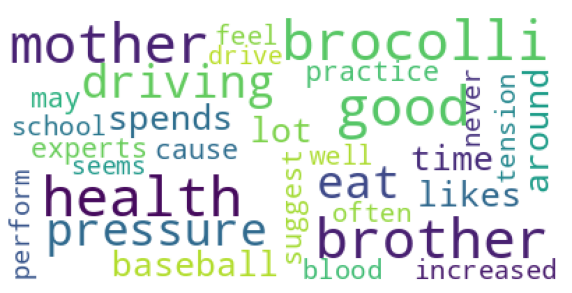

In [25]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color='white',
                      stopwords=stopwords,
                      max_words=30,
                      max_font_size=40,
                      random_state=42).generate(str(doc_set))
fig = plt.figure(1,figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off');

**Latent Dirichlet Allocation**

In [26]:
lda = LatentDirichletAllocation(n_components=2,random_state=0)

In [27]:
n_top_words = 3
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2,stop_words='english')

In [28]:
tf_matrix = tf_vectorizer.fit_transform(doc_set)

In [29]:
tf_df = pd.DataFrame(tf_matrix.toarray())
tf_feature_names = tf_vectorizer.get_feature_names_out()
tf_df.columns = tf_feature_names
tf_df

,brocolli,brother,driving,good,health,mother,pressure
0,2,1,0,2,0,1,0
1,0,1,1,0,0,1,0
2,0,0,1,0,1,0,1
3,0,1,0,0,0,1,1
4,1,0,0,1,2,0,0


In [30]:
lda.fit(tf_matrix) 

LatentDirichletAllocation(n_components=2, random_state=0)

In [31]:
df = pd.DataFrame(lda.components_)
df.columns = tf_feature_names
df

,brocolli,brother,driving,good,health,mother,pressure
0,0.508768,2.577796,2.48832,0.508768,1.330194,2.577797,2.488321
1,3.491232,1.422204,0.51168,3.491232,2.669806,1.422203,0.511679


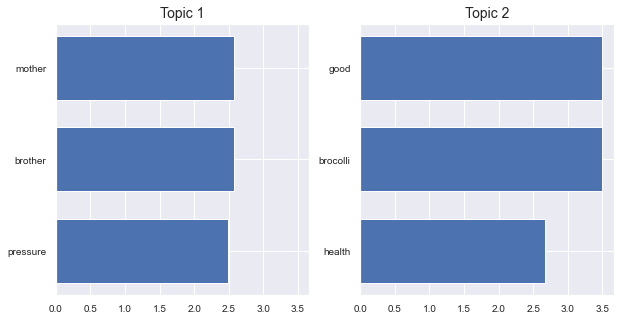

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharex=True)
axes = axes.flatten()
for topic_idx, topic in enumerate(lda.components_):
    top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
    top_features = [tf_feature_names[i] for i in top_features_ind]
    weights = topic[top_features_ind]

    ax = axes[topic_idx]
    ax.barh(top_features, weights, height=0.7)
    ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 14})
    ax.invert_yaxis()
    ax.tick_params(axis='both', which='major', labelsize=10)


Now with TFIDF

In [42]:

tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2,stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(doc_set)
df = pd.DataFrame(tfidf_matrix.toarray())
tfid_feature_names = tfidf_vectorizer.get_feature_names_out()
df.columns = tfid_feature_names
df

,brocolli,brother,driving,good,health,mother,pressure
0,0.653089,0.271062,0.000000,0.653089,0.000000,0.271062,0.000000
1,0.000000,0.538283,0.648463,0.000000,0.000000,0.538283,0.000000
2,0.000000,0.000000,0.577350,0.000000,0.577350,0.000000,0.577350
3,0.000000,0.538283,0.000000,0.000000,0.000000,0.538283,0.648463
4,0.408248,0.000000,0.000000,0.408248,0.816497,0.000000,0.000000


In [39]:
lda.fit(tfidf_matrix) 


LatentDirichletAllocation(n_components=2, random_state=0)

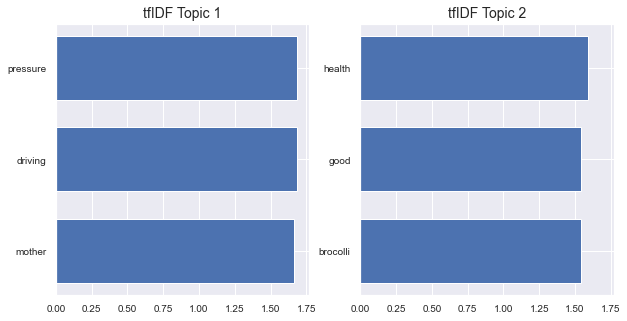

In [43]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharex=True)
axes = axes.flatten()
for topic_idx, topic in enumerate(lda.components_):
    top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
    top_features = [tfid_feature_names[i] for i in top_features_ind]
    weights = topic[top_features_ind]

    ax = axes[topic_idx]
    ax.barh(top_features, weights, height=0.7)
    ax.set_title(f'tfIDF Topic {topic_idx +1}',
                     fontdict={'fontsize': 14})
    ax.invert_yaxis()
    ax.tick_params(axis='both', which='major', labelsize=10)